## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 87](#Problem-87)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 87 <a name="Problem-87"></a>

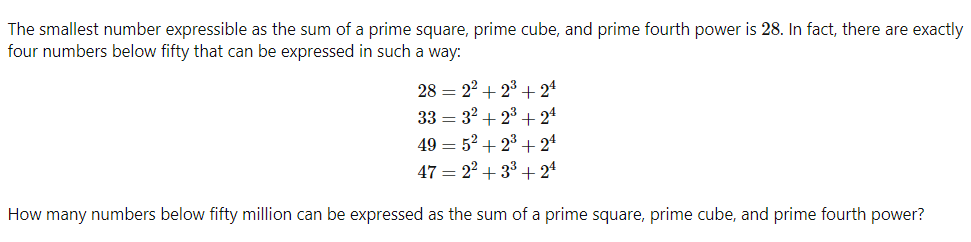

<br>
**$Hint$**

Largest possible primes is equal to square root of the limit. Furthermore, It is much faster to make the fourth powers to be the outer loop.

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time

## Main Solution <a name="Main-Solution"></a>

First we generate all possible primes based on [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) Algorithm.

In [ ]:
def generate_primes_below(n):
    sieve = [True]*(n+1)
    sieve[0] = sieve[1] = False  #0 and 1 are not primes
    p = 2
    while p**2 < n:
        for i in range(p**2,n+1,p):
            sieve[i] = False

        p += 1
    primes = []
    for i in range(len(sieve)):
        if sieve[i]:
            primes.append(i)

    return primes

Then we tackle the main problem

In [ ]:
start_time = time.time()

limit = 5*10**7
base_limit = int(limit**0.5) + 1
primes = generate_primes_below(base_limit)

count = 0
counted = set()  #for skipping duplicate sums

for forth in primes:
    x = forth**4
    if x < limit:
        for cube in primes:
            y = cube**3
            if x + y < limit:
                for square in primes:
                    z = square**2
                    if x + y + z < limit and x + y + z not in counted:
                        count += 1
                        counted.add(x + y + z)

answer = count

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 1097343 
Execution time: 1.2979 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

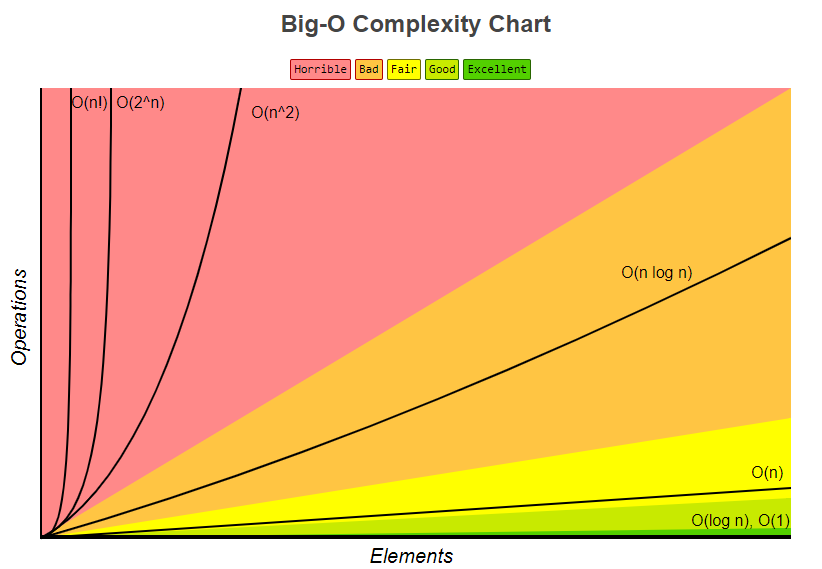


**Time Complexity**:

1. **Generating Primes**: The function uses the Sieve of Eratosthenes algorithm to generate prime numbers up to $n$. The time complexity of this function is approximately $O(n*log(log(n)))$ as it involves marking composite numbers in the sieve. This step has a significant impact on the overall time complexity.

2. **Nested Loops**: The nested loops iterate over the prime numbers, cubes, and squares. Since the loops are nested, the time complexity is determined by the product of the sizes of the loops. In this case, the time complexity is approximately $O(n^{3/2})$ because we are iterating over the primes up to base_limit (square root of limit), cubes, and squares.


Overall, **the time complexity** of my code is approximately $O(n^{3/2}) * log(log(n)))$.

<br>

**Space Complexity**:

1. **Sieve**: The function creates a sieve list of size $n+1$. Hence, the space complexity of the sieve is $O(n)$.

2. **primes List**: The function also creates a primes list to store the generated prime numbers. The size of this list depends on the number of prime numbers up to $n$, which is approximately $n/log(n)$. Therefore, the space complexity of the primes list is $O(n/log(n))$.

3. **Counted Set**: The counted set stores the unique sums that have already been counted. The size of this set depends on the number of unique sums, which can be up to $O(n^{3/2})$. Hence, the space complexity of the counted set is $O(n^{3/2})$.


Overall, the **space complexity** of my code is $O(n)$ due to the sieve, primes list, and counted set.